In [19]:
from natsort import natsorted

In [62]:
feats = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
labels = natsorted([1234, 23466, 93456, 14754, 3829, 92027, 97384, 4849, 2345, 6783, 9397, 54350, 16718, 4123, 23487, 9748, 9383, 6353, 1267, 18364, 2643, 1234, 2637, 4562, 9393, 8172])

In [63]:
len(feats)

26

In [64]:
len(labels)

26

In [65]:
from sklearn.model_selection import train_test_split

hmmm. sort them.

In [66]:
tr_feat, tst_feat, tr_lab, tst_lab = train_test_split(feats, labels, test_size=0.3, random_state=0)

In [67]:
tr_lab

[16718,
 18364,
 9748,
 1234,
 6353,
 97384,
 93456,
 4562,
 3829,
 2637,
 4849,
 4123,
 92027,
 2345,
 1234,
 23487,
 9397,
 8172]

In [68]:
tst_lab

[1267, 23466, 9393, 14754, 2643, 6783, 54350, 9383]

In [69]:
import numpy as np

In [70]:
np.histogram(np.array(tr_lab))

(array([12,  2,  1,  0,  0,  0,  0,  0,  0,  3]),
 array([ 1234., 10849., 20464., 30079., 39694., 49309., 58924., 68539.,
        78154., 87769., 97384.]))

In [71]:
import matplotlib.pyplot as plt

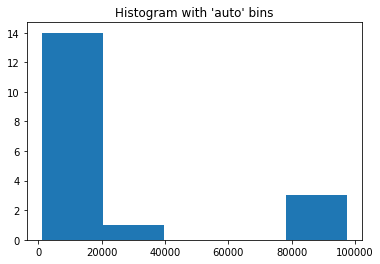

In [72]:
_ = plt.hist(tr_lab, bins=5)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

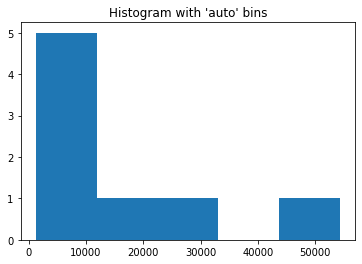

In [73]:
_ = plt.hist(tst_lab, bins=5)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

---

In [76]:
import os
os.chdir('/Users/layne/Desktop/aiqc')
os.getcwd()

'/Users/layne/Desktop/aiqc'

In [77]:
import aiqc
from aiqc import datum

/Users/layne/.pyenv/versions/3.7.6/envs/jupyterlab/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [224]:
df = datum.to_pandas('exoplanets.parquet')

In [225]:
df

,TypeFlag,PlanetaryMassJpt,PeriodDays,SurfaceTempK,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK
5,0,0.2500,19.224180,707.2,650.00,1.070,1.0200,0.12,5777.0
6,0,0.1700,39.031060,557.9,650.00,1.070,1.0200,0.12,5777.0
7,0,0.0220,1.592851,1601.5,650.00,1.070,1.0200,0.12,5777.0
15,0,1.2400,2.705782,2190.0,200.00,1.630,2.1800,0.12,6490.0
16,0,0.0195,1.580404,604.0,14.55,0.176,0.2213,0.10,3250.0
...,...,...,...,...,...,...,...,...,...
3557,0,0.2200,6.212290,783.1,380.00,0.880,0.7700,0.30,5080.0
3574,0,4.0630,4.124461,1161.5,254.00,0.947,1.1050,0.01,5588.0
3577,0,3.3280,5.452700,1335.3,257.00,1.392,1.5350,0.22,6442.0
3581,0,1.3600,395.400000,256.8,68.50,1.000,1.2200,0.14,5407.0


In [226]:
df = df[df['PeriodDays'] < 10000]

In [227]:
period = df['PeriodDays'].to_list()

In [228]:
flag = df['TypeFlag'].to_list()

In [229]:
len(period)

429

In [230]:
len(flag)

429

In [231]:
period_round = [round(i) for i in period]

In [232]:
import pandas as pd

In [235]:
len(period_round)

429

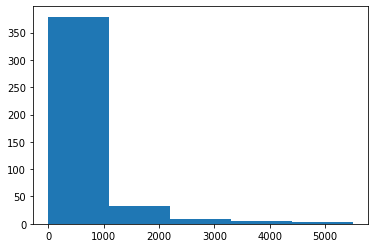

In [236]:
_ = plt.hist(period_round, bins=5)  # arguments are passed to np.histogram

plt.show()

In [238]:
df.head()

,TypeFlag,PlanetaryMassJpt,PeriodDays,SurfaceTempK,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK
5,0,0.2500,437.0,707.2,650.00,1.070,1.0200,0.12,5777.0
6,0,0.1700,14.0,557.9,650.00,1.070,1.0200,0.12,5777.0
7,0,0.0220,12.0,1601.5,650.00,1.070,1.0200,0.12,5777.0
15,0,1.2400,4.0,2190.0,200.00,1.630,2.1800,0.12,6490.0
16,0,0.0195,4.0,604.0,14.55,0.176,0.2213,0.10,3250.0


In [240]:
period_round = [round(i) for i in df['PeriodDays'].to_list()]

In [241]:
df['PeriodDays'] = period_round

In [249]:
df = df.astype({'PeriodDays':'int64'})

In [256]:
flat_period

[437,
 14,
 12,
 4,
 4,
 264,
 460,
 480,
 4,
 5,
 2,
 4,
 1733,
 4,
 280,
 626,
 2,
 2,
 10,
 990,
 3,
 1,
 2049,
 4,
 1,
 2231,
 45,
 4,
 6,
 3,
 4,
 883,
 5,
 1283,
 3849,
 4,
 4,
 5,
 13,
 3,
 36,
 76,
 377,
 29,
 60,
 143,
 2627,
 54,
 111,
 11,
 4,
 8,
 4,
 3,
 4,
 507,
 6,
 1600,
 2,
 356]

In [255]:
pd.qcut(x=flat_period, q=3)

[(87.667, 3849.0], (4.0, 87.667], (4.0, 87.667], (0.999, 4.0], (0.999, 4.0], ..., (87.667, 3849.0], (4.0, 87.667], (87.667, 3849.0], (0.999, 4.0], (87.667, 3849.0]]
Length: 60
Categories (3, interval[float64]): [(0.999, 4.0] < (4.0, 87.667] < (87.667, 3849.0]]

In [246]:
tr_feat, tst_feat, tr_lab, tst_lab = train_test_split(
    period_round, period_round, 
    test_size=0.6, random_state=0, 
    stratify = period_round
)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

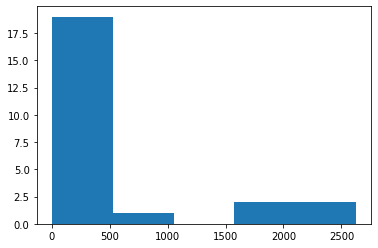

In [244]:
_ = plt.hist(tr_lab, bins=5)  # arguments are passed to np.histogram

plt.show()

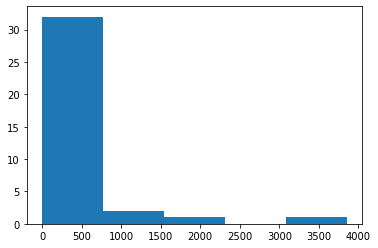

In [245]:
_ = plt.hist(tst_lab, bins=5)  # arguments are passed to np.histogram

plt.show()

In [199]:
dataset = aiqc.Dataset.Tabular.from_pandas(df)

In [200]:
label_col = 'PeriodDays'

In [201]:
label = dataset.make_label(columns=[label_col])

In [202]:
featureset = dataset.make_featureset(exclude_columns=[label_col])

In [ ]:
splitset = featureset.make_splitset(
    label_id = label.id
    , size_test = 0.3
    , 
)